## Connecttel
### Customer churn Prediction

#### 1.0 Library Importation

In [252]:
# Import necessary libraries

# Data analysis libraries
import pandas as pd
import numpy as np

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import missingno as msno # missing data visualization


# Classifiers libraries, preprocessing i.e machine learning algorithms
from sklearn.preprocessing import MinMaxScaler #helps to normalizes data between zero and one
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

#Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [253]:
# Environment settings: 
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)

In [254]:
# import dataset 
 
df = pd.read_csv(r"C:\Users\lolab\Downloads\Customer-Churn - Customer-Churn.csv")


In [255]:
#import first 5 R & c
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [256]:
df.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [ ]:
# check dataset information

df.info()

In [ ]:
# Descriptive Statistics of Numerical Columns
df.describe().T

In [ ]:
# Descriptive Statistics of Categorical Columns

df.describe(include=['object', 'bool'])

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
# Check for missing values in the dataframe
missing_values_count = df.isnull().sum()
print(missing_values_count)

In [ ]:
# Visualize missing values using a heatmap
plt.figure(figsize = (10,3))
sns.heatmap(df.isnull(),cbar = True, cmap = "PRGn")

In [ ]:
# display where the missing data is  present/exist in the data.

df[df.isnull().any(axis=1)]

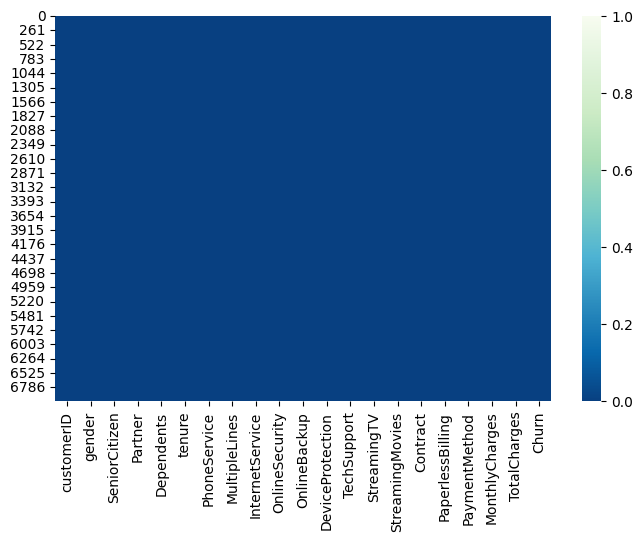

In [265]:
# visualize missing data.
plt.figure(figsize = (8,5))
sns.heatmap(df.isnull(), cbar=True , cmap="GnBu_r");

In [266]:
# since our mssing values are 11 out of dataset of over 7000, I am dropping them.
#Drop missing data using inplace.
df.dropna(inplace=True)

In [267]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [268]:
# Now i  have no missing values, and will porceed to data cleaning

#### 1.1 Data Cleaning and Pre-Processing
##### 1.2 Data Pre-Processing

In [269]:
# Checking for duplicates
df.duplicated().sum()

0

In [270]:
df.sample()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6210,1042-HFUCW,Female,0,No,Yes,25,Yes,No,DSL,No,Yes,No,Yes,No,No,One year,Yes,Credit card (automatic),54.75,1266.35,No


## Exploratory Data Analysis.


##### Univariate Analysis:  

- Univariate analysis involves examining individual variables in the dataset.I will visualize the distribution of each variable.



##### Bivariate Analysis: 

- Bivariate analysis involves examining the relationship between two variables. I will visualize how the target variable ("Churn") is influenced by other variables.



##### Multivariate Analysis: 

- Multivariate analysis involves exploring relationships between multiple variables simultaneously. I will  use correlation matrices and pair plots.


In [271]:
# Replace entries under 'StreamingTV', Online security, online backup, device protection, 
#techsupport and 'StreamingMovies' with 'No'

df['StreamingTV'] = df['StreamingTV'].replace('No internet service', 'No')
df['StreamingMovies'] = df['StreamingMovies'].replace('No internet service', 'No')
df['OnlineSecurity'] = df['OnlineSecurity'].replace('No internet service', 'No')
df['OnlineBackup'] = df['OnlineBackup'].replace('No internet service', 'No')
df['TechSupport'] = df['TechSupport'].replace('No internet service', 'No')


In [272]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [273]:
## Visualization relationships using Plots.

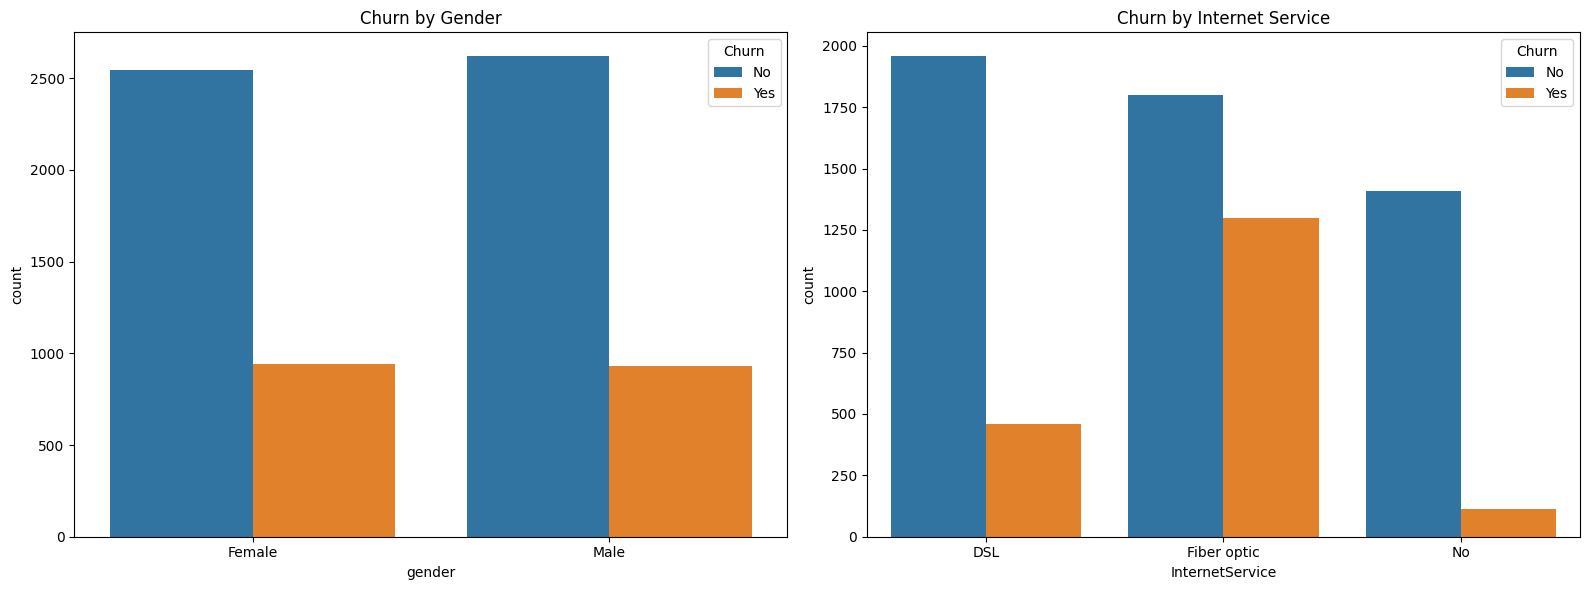

In [274]:
# Create a figure with two subplots
plt.figure(figsize=(16, 6))

# First subplot: Churn by Gender
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
sns.countplot(x='gender', hue='Churn', data=df)
plt.title("Churn by Gender")

# Second subplot: Churn by Internet Service
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title("Churn by Internet Service")


# Adjust layout and display
plt.tight_layout()
plt.show()

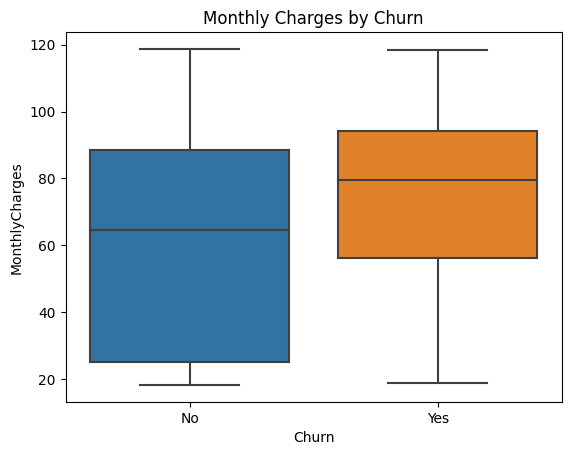

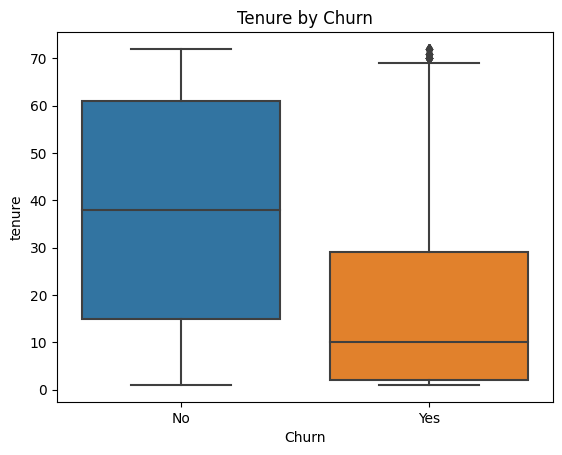

In [275]:


# Box plot for numerical features
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges by Churn")
plt.show()

sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure by Churn")
plt.show()



In [276]:
# is the tenure in months, weeks or days or years?

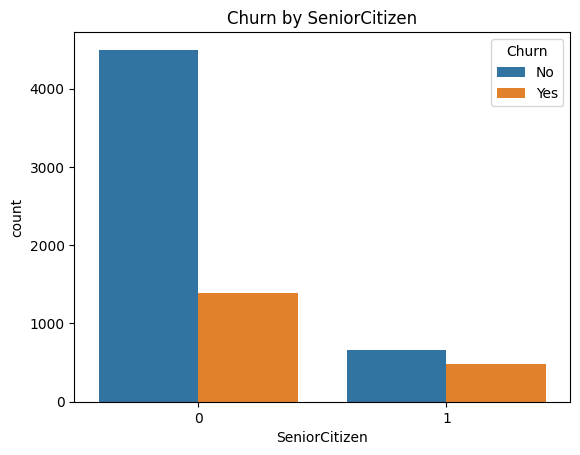

In [277]:
#Churn by seniorcitizens and non seniorcitizens
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.title("Churn by SeniorCitizen")
plt.show()

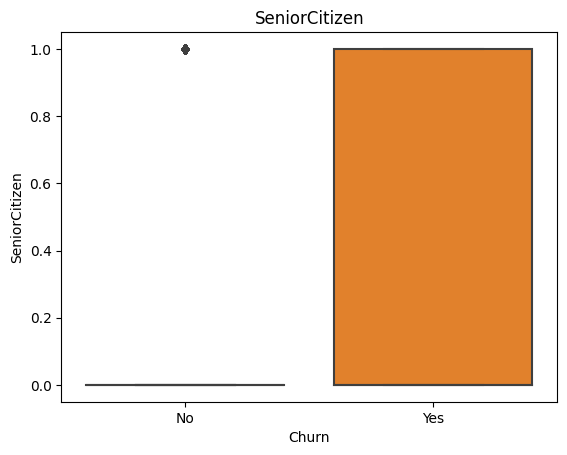

In [278]:
#churn by seniorcitizens alone

sns.boxplot(x='Churn', y='SeniorCitizen', data=df)
plt.title("SeniorCitizen")
plt.show()


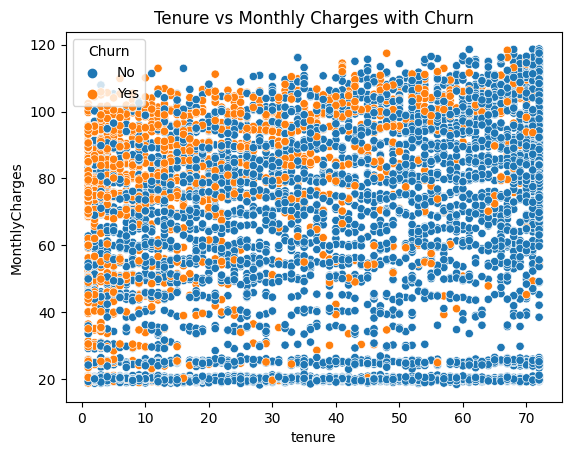

In [279]:
# Scatter plot for numerical features, this has no trend line, separate the x and y against some other features,
# emphasis is on the y axis
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df)
plt.title("Tenure vs Monthly Charges with Churn")
plt.show()

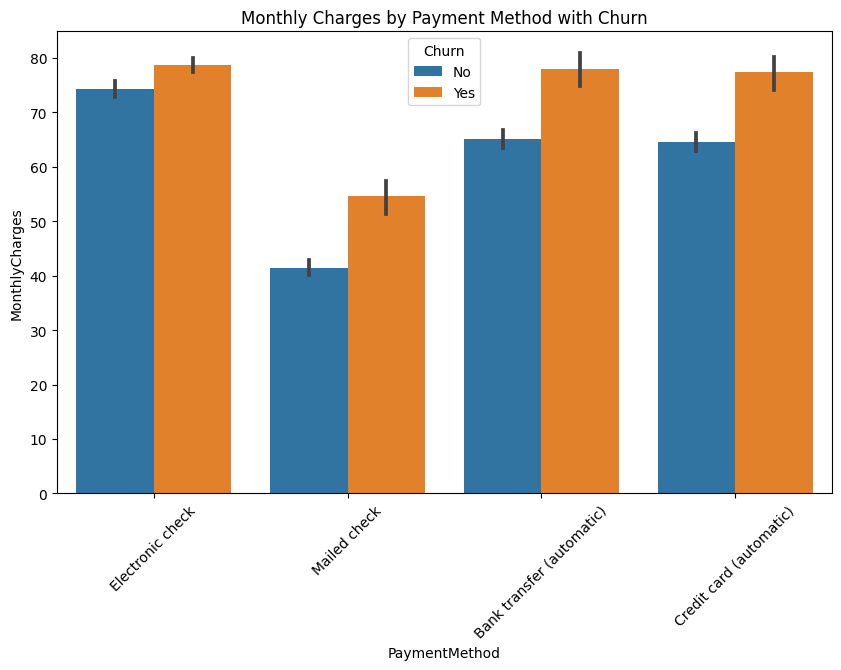

In [ ]:
# Bar plot for "MonthlyCharges" by "PaymentMethod".
plt.figure(figsize=(10, 6))
sns.barplot(x='PaymentMethod', y='MonthlyCharges', hue='Churn', data=df)
plt.title("Monthly Charges by Payment Method with Churn")
plt.xticks(rotation=45)
plt.show()



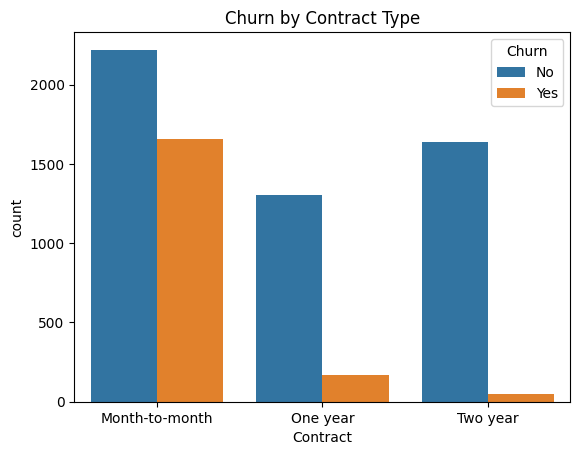

In [ ]:
# Count plot for "Churn" by "Contract"
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")
plt.show()



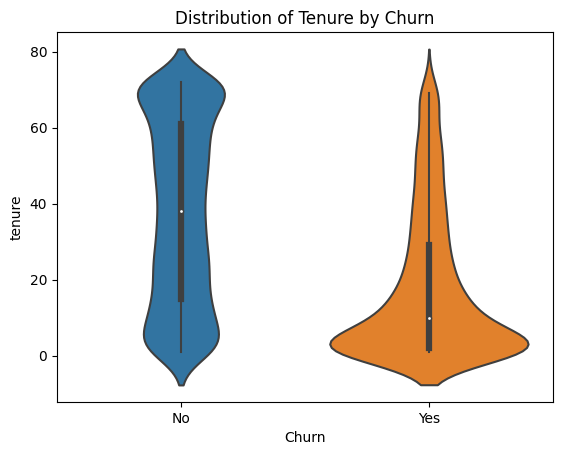

In [ ]:
# Violin plot for "tenure" by "Churn"
sns.violinplot(x='Churn', y='tenure', data=df)
plt.title("Distribution of Tenure by Churn")
plt.show()



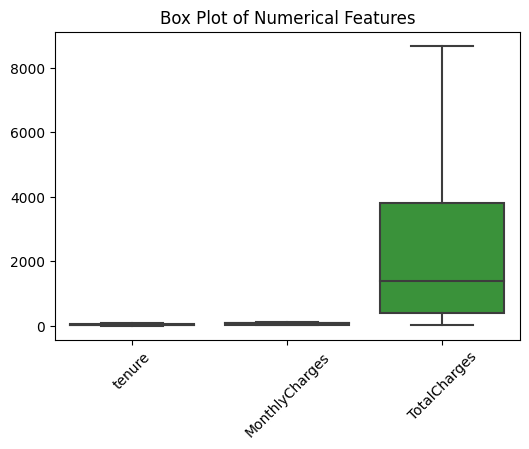

In [ ]:
#checking for outliers


# Selecting only numerical columns for outlier detection
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
numerical_data = df[numerical_columns]

# Plotting box plots to check for outliers
plt.figure(figsize=(6, 4))
sns.boxplot(data=numerical_data)
plt.title("Box Plot of Numerical Features")
plt.xticks(rotation=45)
plt.show()


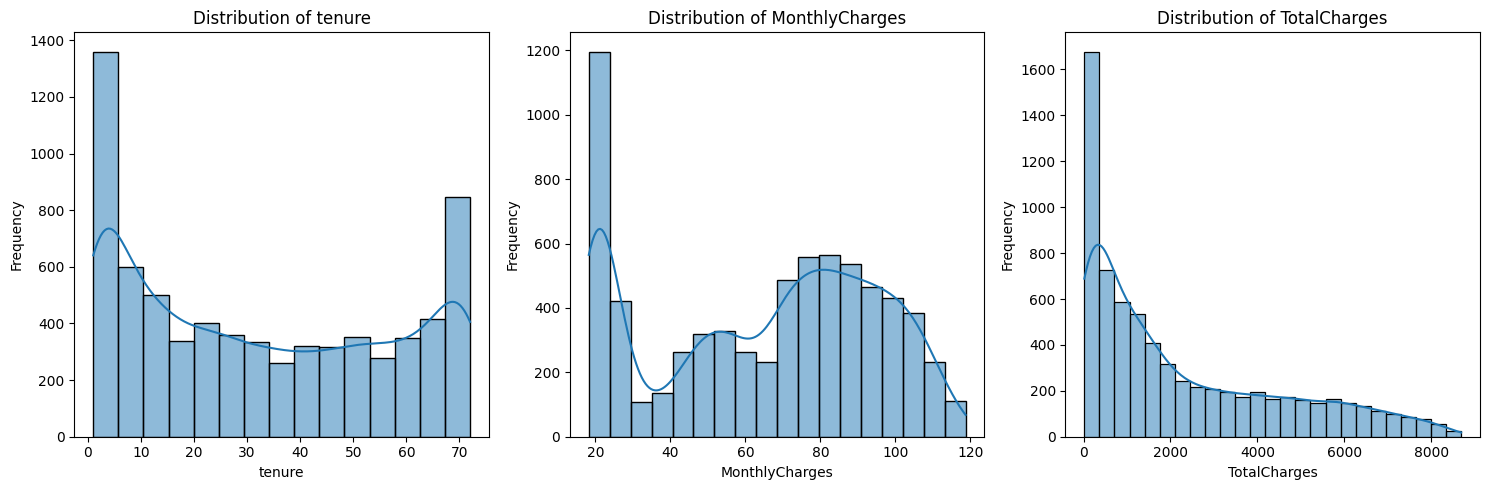

In [ ]:
# Univariate analysis for numerical features
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(15, 5))

for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


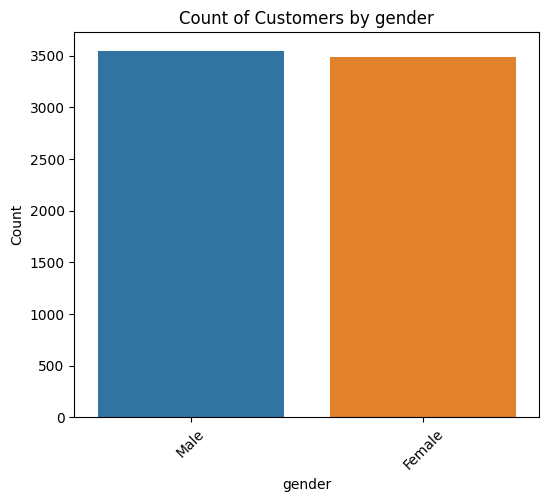

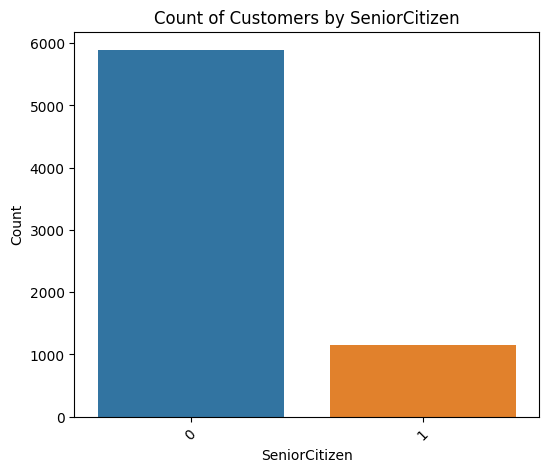

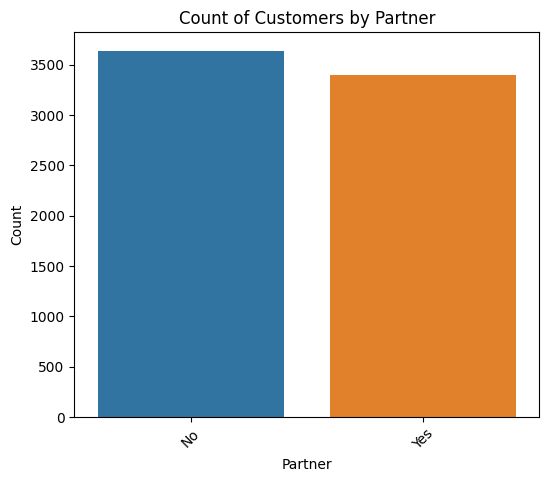

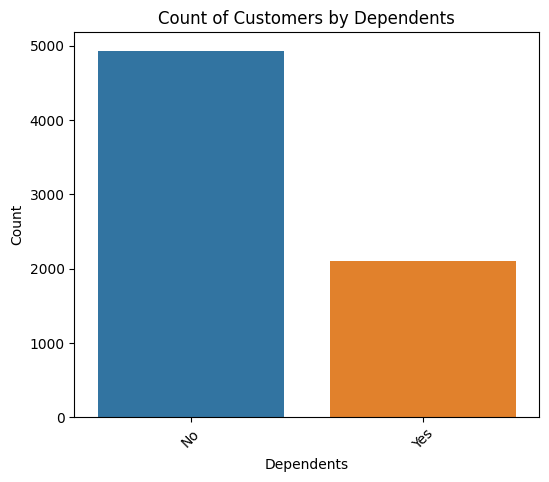

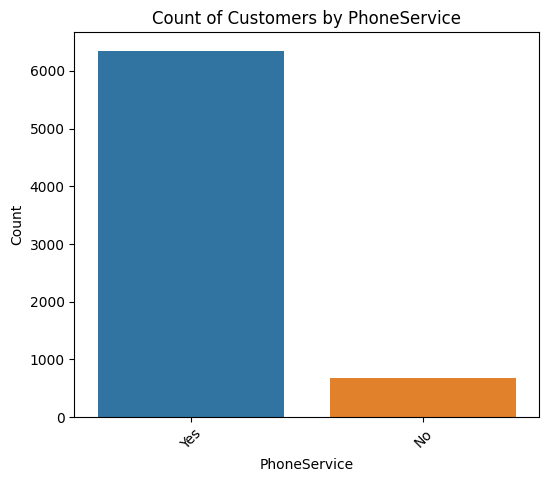

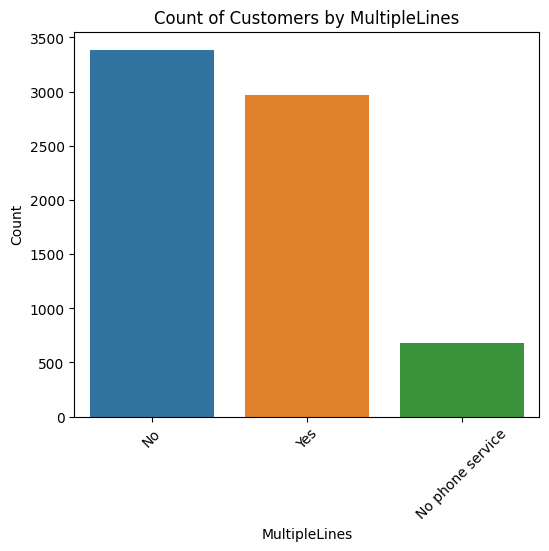

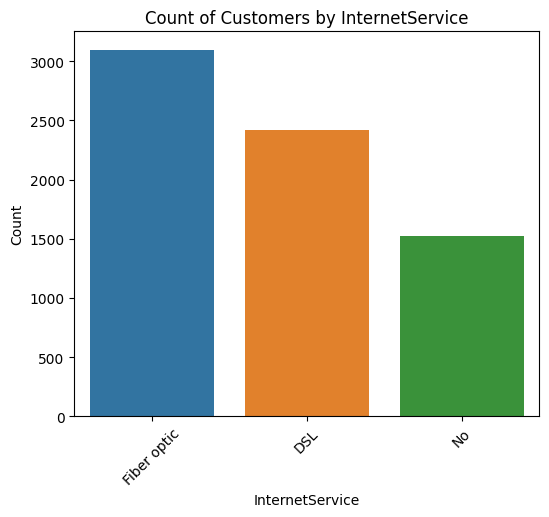

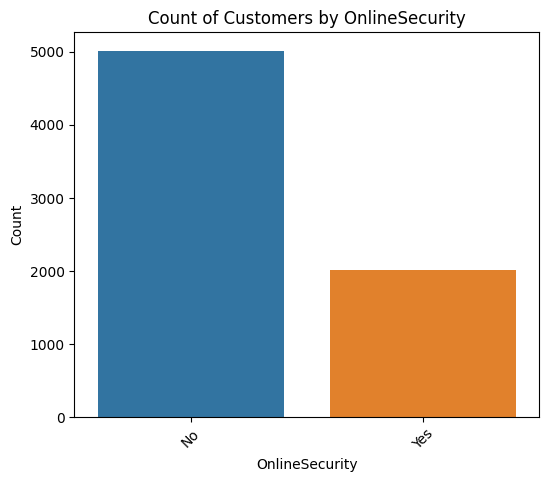

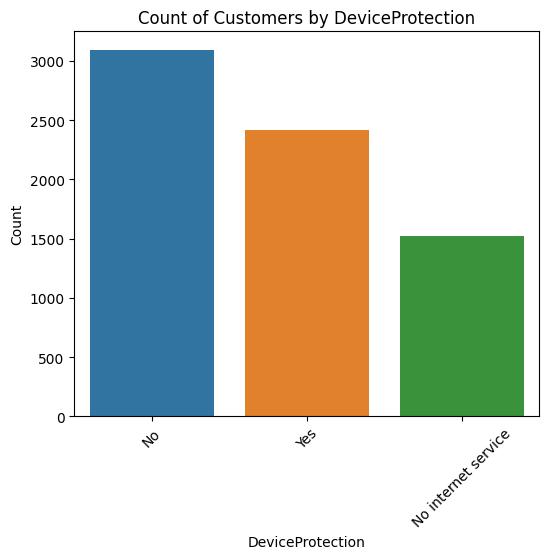

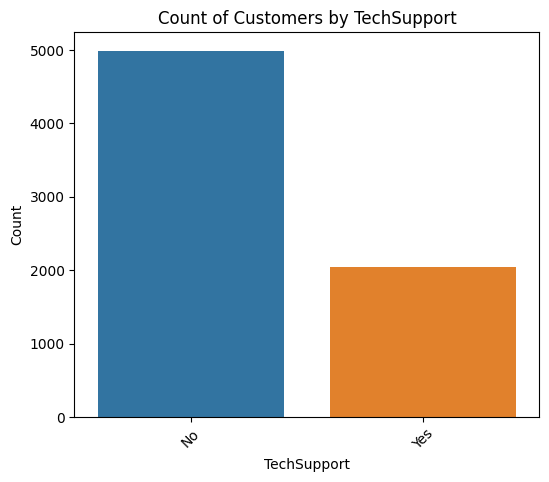

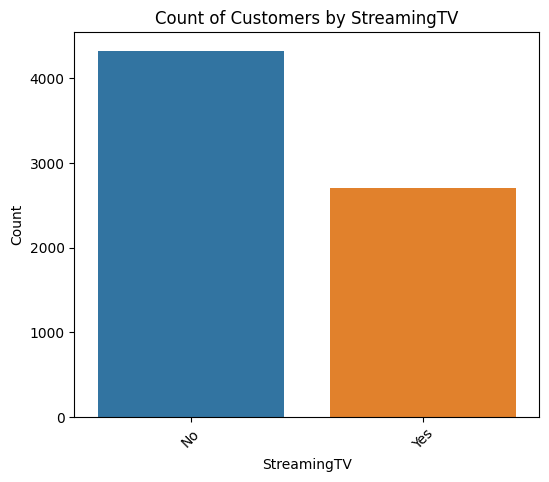

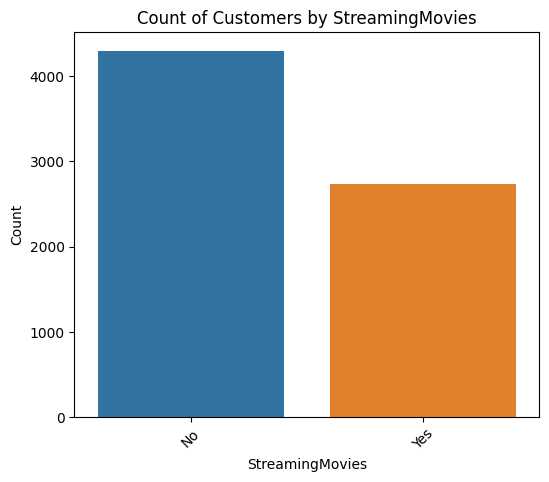

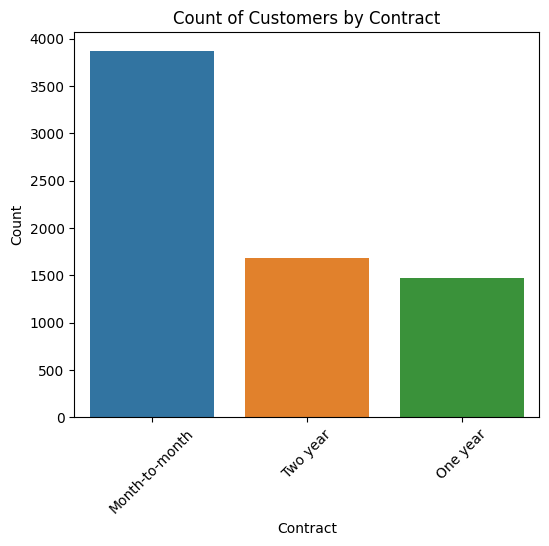

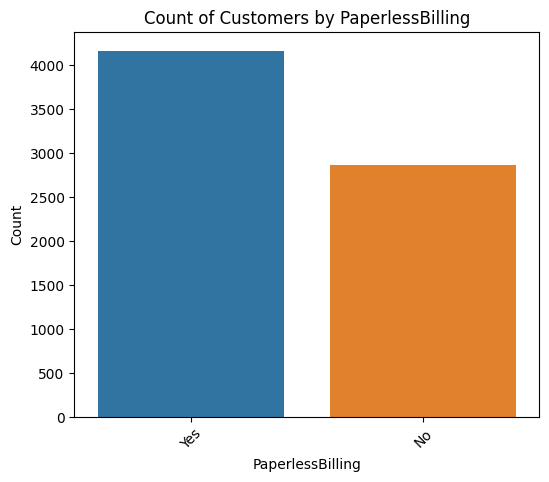

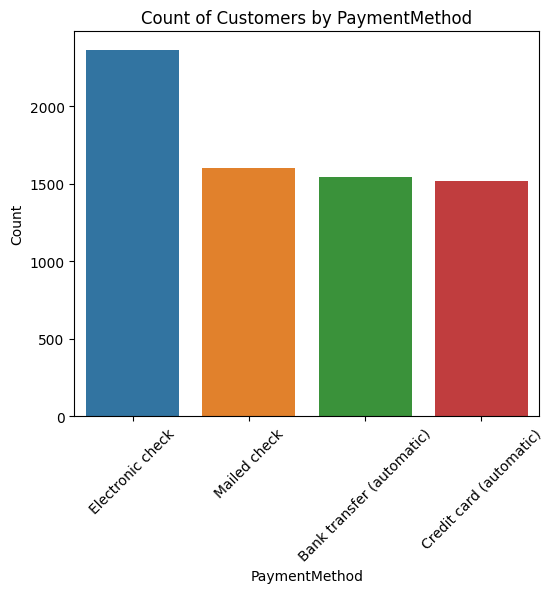

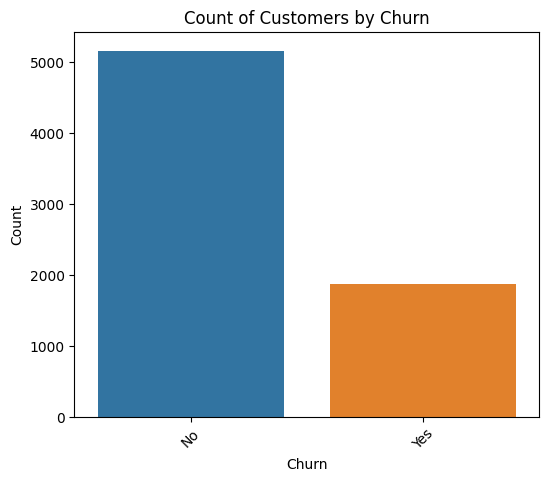

In [ ]:
# Univariate analysis for categorical features
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
for col in categorical_columns:
    plt.figure(figsize=(6, 5))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Count of Customers by {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

## Bivariate Analysis

In [ ]:
#Plotting categories against Churn

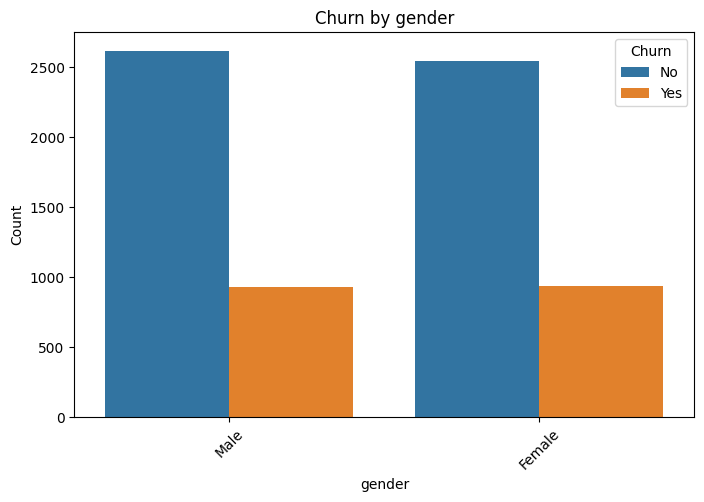

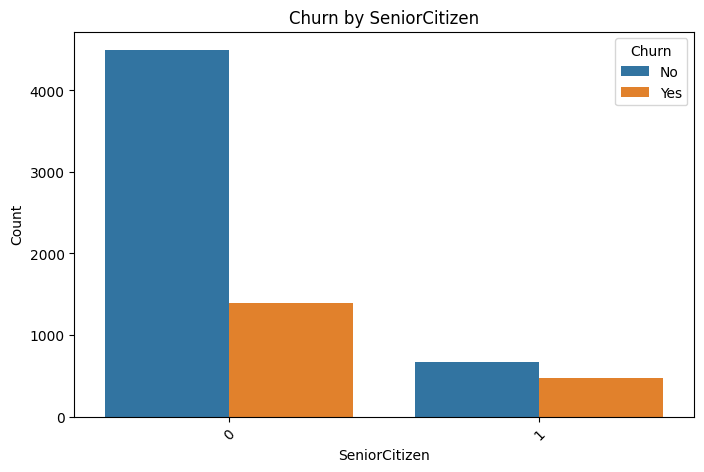

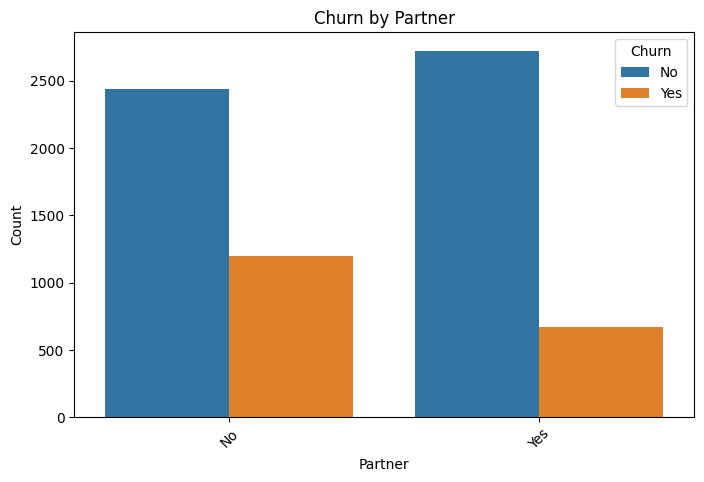

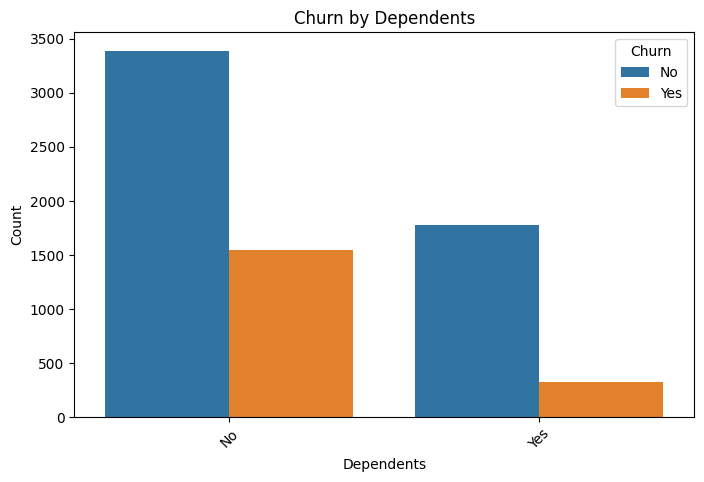

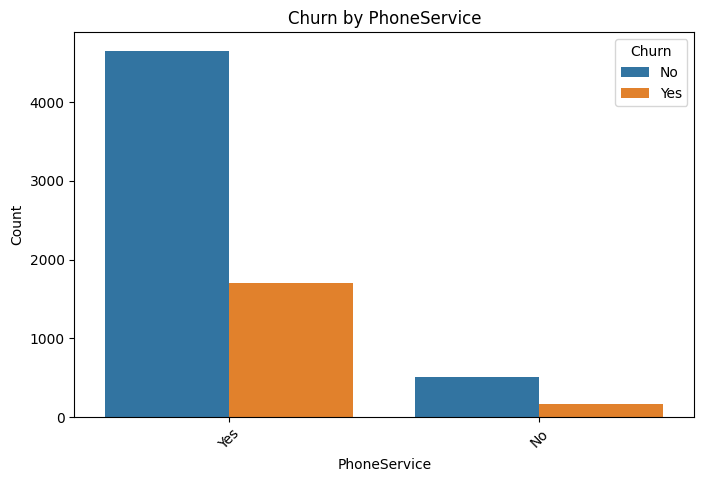

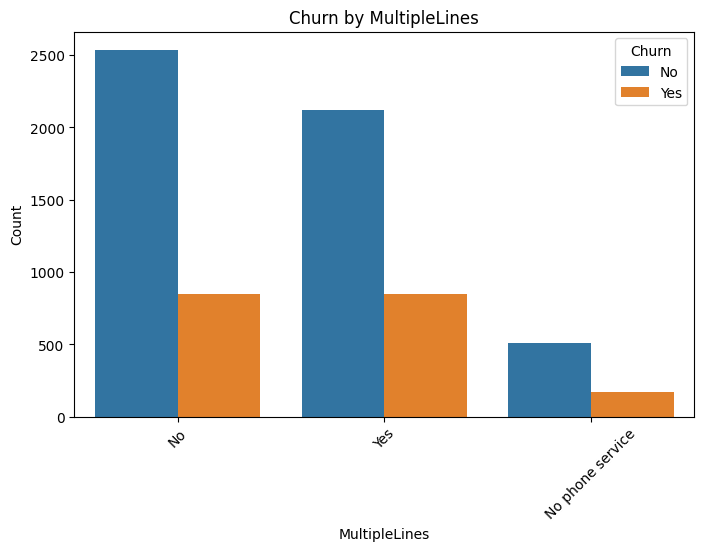

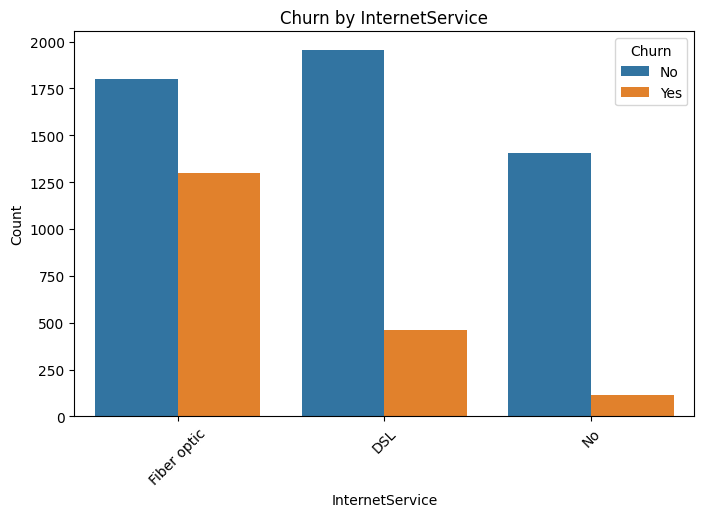

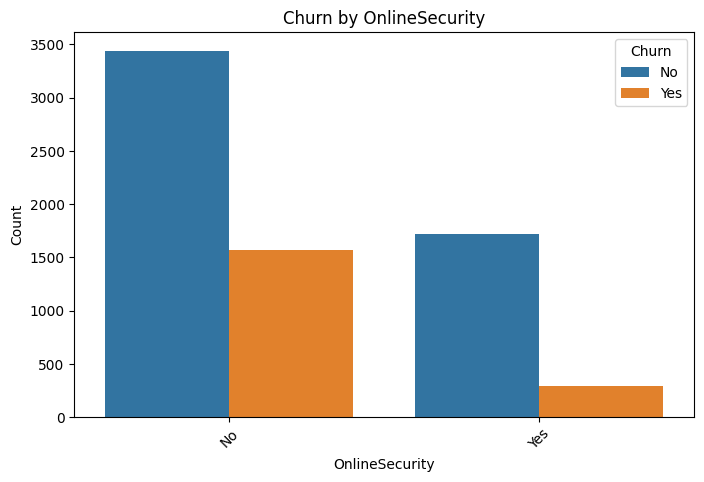

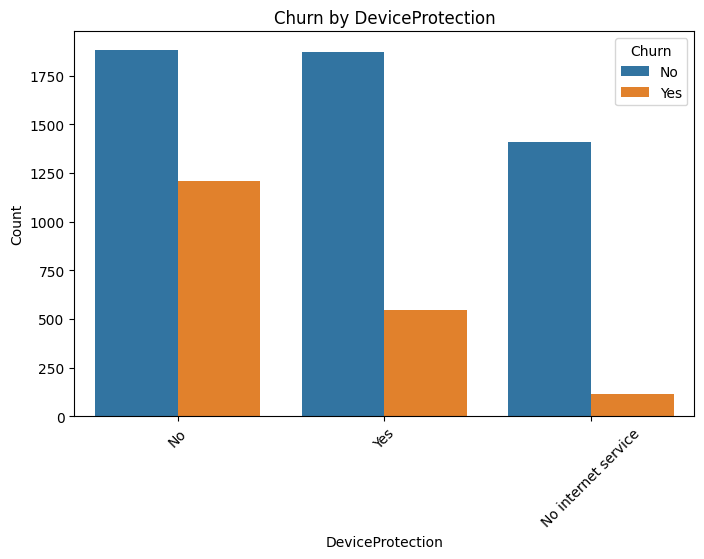

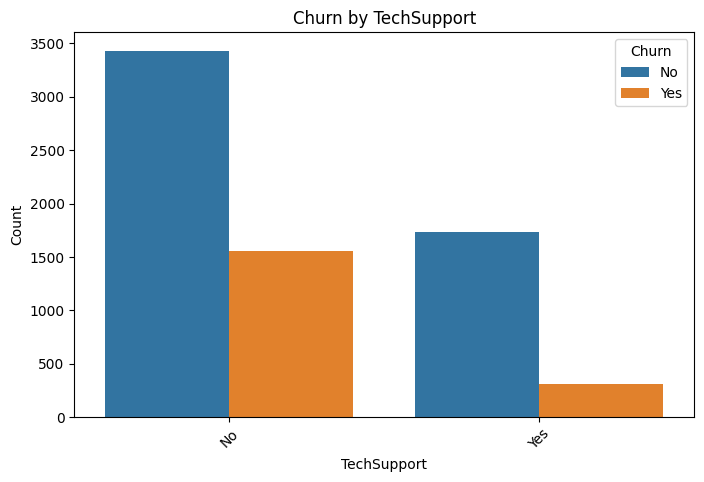

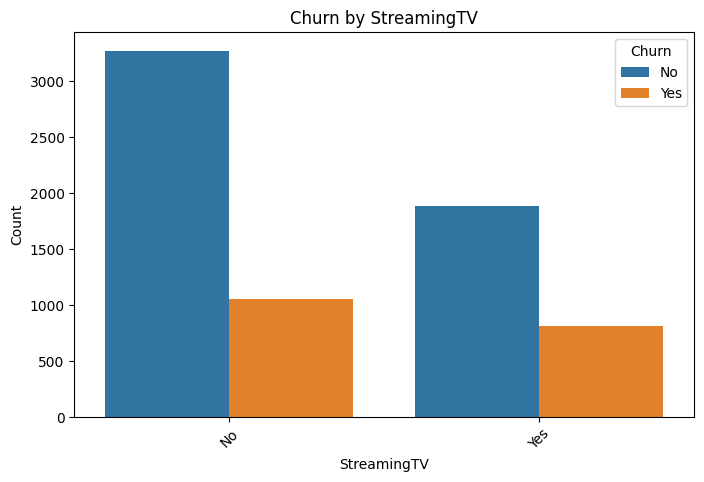

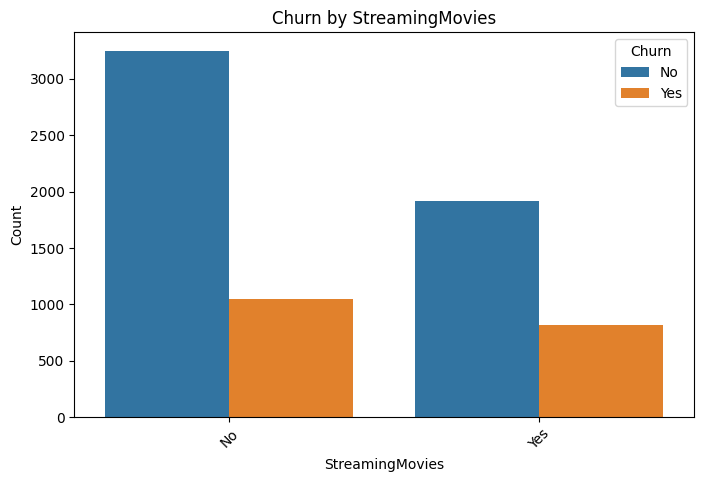

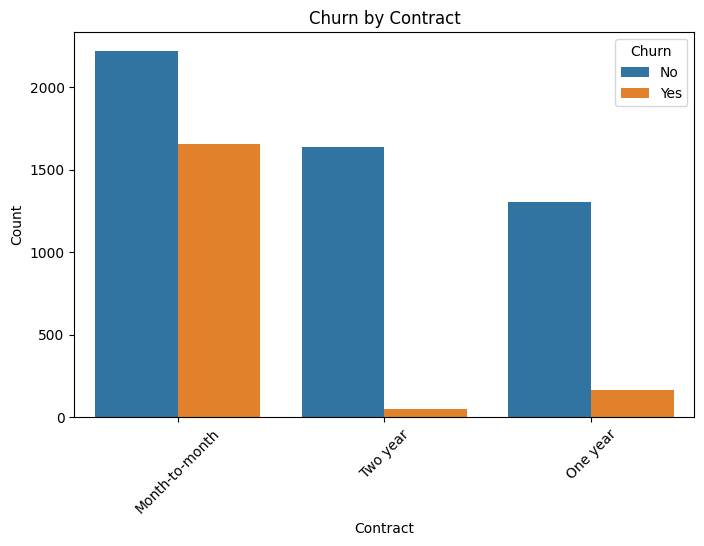

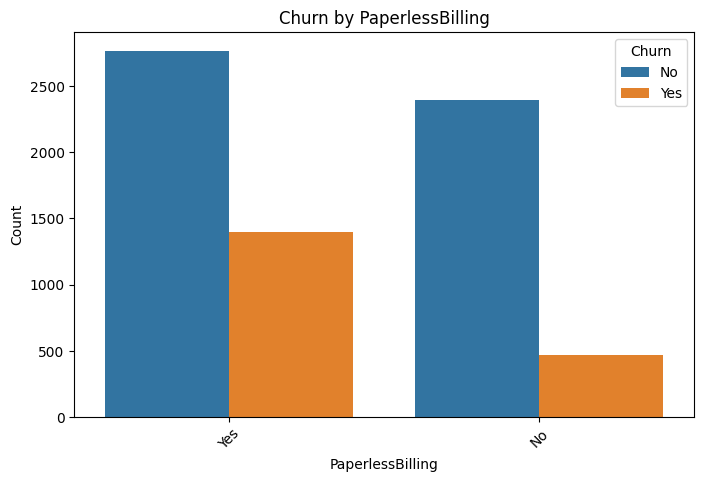

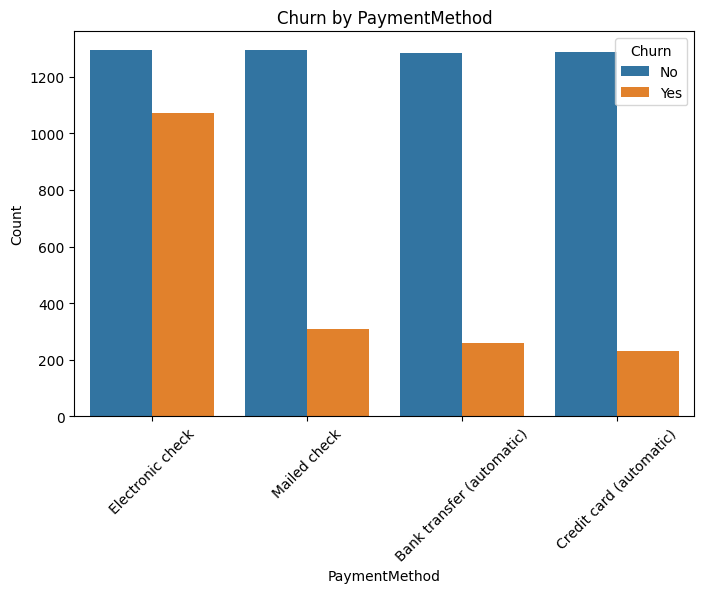

In [ ]:
for col in categorical_columns[:-1]:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='Churn', data=df, order=df[col].value_counts().index)
    plt.title(f"Churn by {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(title="Churn", loc='upper right', labels=["No", "Yes"])
    plt.show()

## Multivariate Analysis

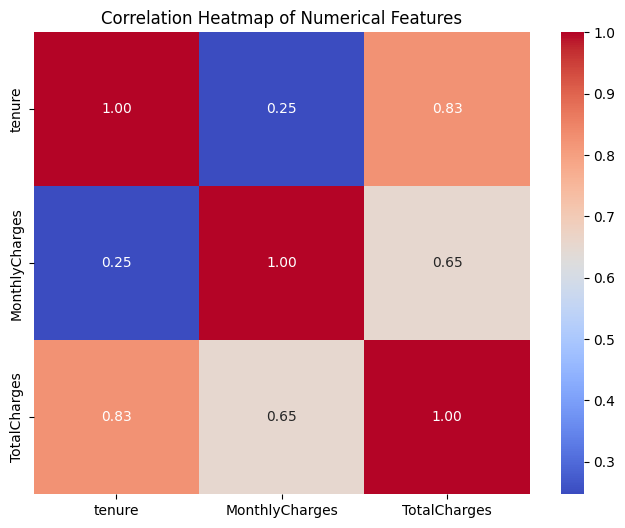

In [ ]:
#Correlation matrix of numerical features , continuous numerical features might be difficult to compare
plt.figure(figsize=(8, 6))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

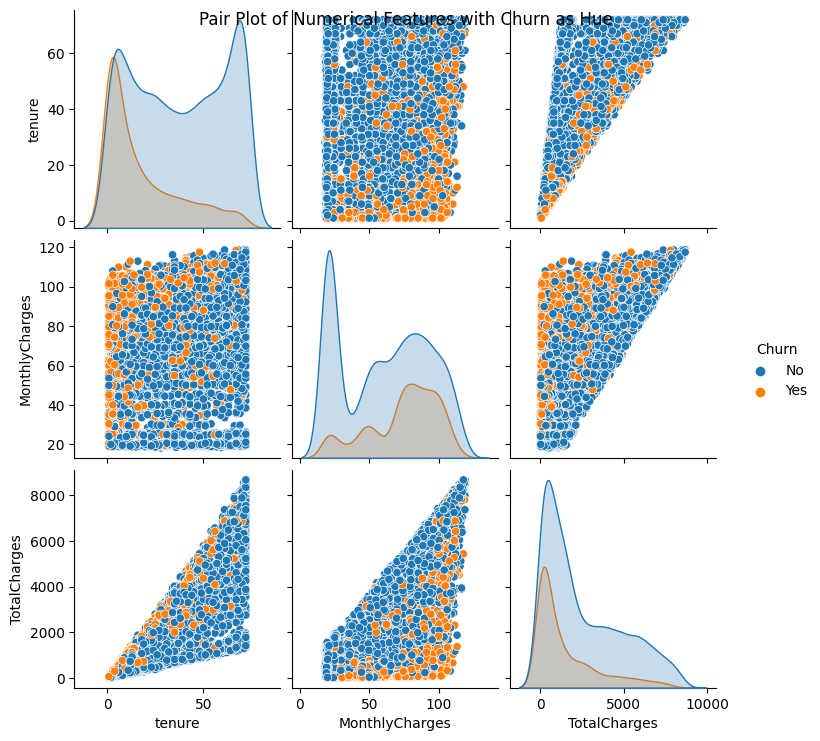

In [ ]:
# Pair plot of numerical features against churn
sns.pairplot(df[numerical_columns + ['Churn']], hue='Churn', diag_kind='kde')
plt.suptitle("Pair Plot of Numerical Features with Churn as Hue")
plt.show()

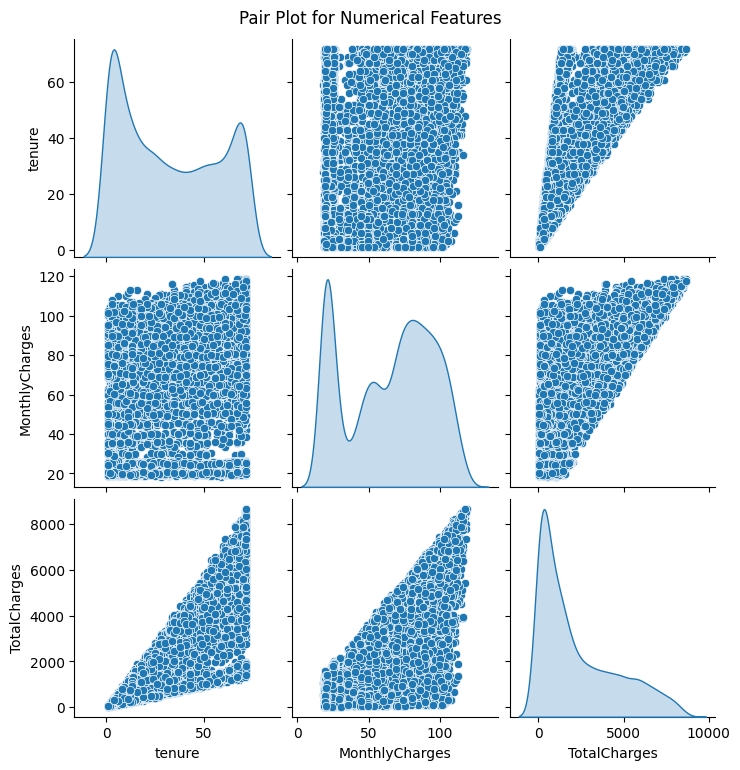

In [ ]:
# Pair Plot for numerical features 
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
sns.pairplot(df[numerical_columns], diag_kind='kde')
plt.suptitle('Pair Plot for Numerical Features', y=1.02)
plt.show()

In [ ]:
print(df['SeniorCitizen'].unique())


[0 1]


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
#There is no need for any plots or charts for categorical values

df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## MACHINE LEARNING / MODEL BUILDING


### Data preprocessing


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Drop customerID as it is not relevant for the prediction.
df.drop('customerID', axis=1, inplace=True)

# Handle missing values if any
df['TotalCharges'] = df['TotalCharges'].replace(' ', 0).astype(float)




In [ ]:
# Encode binary categorical variables using LabelEncoder (helps convert 0s and 1s). this is most situable for ordinal
#categorys as you want to preserve the order in the relationsip
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
label_encoder = LabelEncoder()
for col in binary_cols:
    df[col] = label_encoder.fit_transform(df[col])



In [ ]:
# One-hot encode multi-class categorical variables. each catergoty becomes a column, and changes them to 0s and 1s. This is 
#situable for nominal variables and preserves the distinction between categories without imposing an ordinal relationship
df = pd.get_dummies(df, columns=['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                                     'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                                     'Contract', 'PaymentMethod'])

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,1,1,0,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0


In [ ]:
#Split Data into Features and Target
#Separate the data into features (X) and the target variable (y)


X = df.drop('Churn', axis=1)
y = df['Churn']

In [ ]:
# splitting the dataset (X and y) into two sets: a training set (X_train and y_train) and a testing set (X_test and y_test). 
# The training set is used to train the machine learning model, 
#while the testing set is used to evaluate the model's performance and generalization on unseen data. 
#The test_size parameter determines the proportion of data to allocate for testing, 
#and random_state ensures reproducibility of the splitting process.


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Preprocessing steps for numerical features

# The pipeline first applies the preprocessing steps (scaling) to the numerical features using ColumnTransformer, 
#and then feeds the preprocessed data into the RandomForestClassifier for training and prediction.

# Once the pipeline is created, you can train the model using model.fit(X_train, y_train) 
# and make predictions using model.predict(X_test). The pipeline ensures that all preprocessing steps 
# are consistently applied to both the training and testing datasets, preventing any data leakage and 
# making it easier to maintain the model's integrity.

numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine all preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Create the pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [ ]:
# Drop samples with missing values from both X_train and y_train
X_train = X_train.dropna()
y_train = y_train[X_train.index]

# Drop samples with missing values from both X_test and y_test
X_test = X_test.dropna()
y_test = y_test[X_test.index]

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
#Prediction 

y_pred = model.predict(X_test)

In [ ]:
# Predicted churn value against original churn value for the data that the model has not seen before

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.759772565742715


In [ ]:

# taking the predicted against the ones 

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)



Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84      1033
           1       0.56      0.43      0.49       374

    accuracy                           0.76      1407
   macro avg       0.69      0.65      0.66      1407
weighted avg       0.74      0.76      0.75      1407



<Axes: >

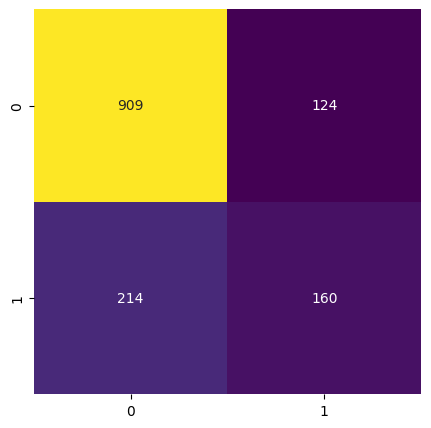

In [ ]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,cbar=False,fmt='d',cmap='viridis')

In [ ]:

# Create the pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])
model.fit(X_train, y_train)

In [ ]:
#Prediction 

y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


In [ ]:
# confussion matrix
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,cbar=False,fmt='d',cmap='viridis')

In [ ]:
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)


In [ ]:
test_df = pd.DataFrame(X_test, columns=X.columns)

# Add the true labels (y_test) and the predicted labels (y_pred) to the DataFrame
test_df['True_Label'] = y_test
test_df['Predicted_Label'] = y_pred




In [ ]:
test_df.head()
